# THE SPARKS FOUNDATION

# DOMAIN : DATA SCIENCE AND BUSINESS ANALYTICS

### NAME : MADHUSMITA BARIK , NIT ROURKELA

# TASK 1 :Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ 

<b>As a business manager, we need to perform Exploratory Data Analysis on the given dataset and to find out the weak areas where we can work to make more profit. </b>

In [34]:
#importing libraries
import pandas as pd
import numpy as np

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
%matplotlib inline
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

<b>Exploring and understanding the dataset.</b>

In [3]:
df = pd.read_csv('D:\SampleSuperstore.csv')

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [37]:
#data containing different data types
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
# unique values in each columns
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
# checking duplicate values
df.duplicated().sum()

17

In [11]:
# dropping duplicate values
df.drop_duplicates(inplace =True)

In [38]:
#checking the shape of dataset again after dropping the duplicate values
df.shape

(9977, 12)

In [13]:
df.drop(['Postal Code'], axis = 1, inplace = True)

In [14]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [39]:
#checking the shape of dataset again after dropping the duplicate values
df.shape

(9977, 12)

In [36]:
#description of the dataset
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [40]:
#checking correlation between the columns
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


<AxesSubplot:>

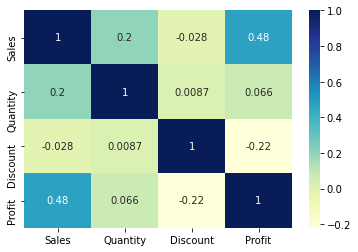

In [17]:
sns.heatmap(df.corr(),cmap='YlGnBu', annot = True)

## Data Visualisation

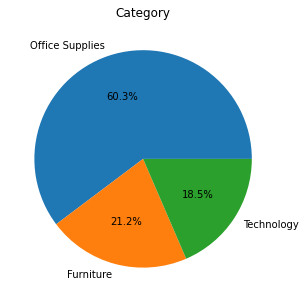

In [19]:
plt.figure(figsize = (5,5))
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index, autopct= '%1.1f%%')
plt.title('Category')
plt.show()

#### From above we can conclude that Office Supplies have highest demand compared to the others

In [20]:
trace=go.Heatmap(x=df['Region'],
                y=df['Category'],
                z=df['Profit'],
                type='heatmap',
                 colorscale='Viridis'
                )

data = [trace]
fig = go.Figure(data = data)
iplot(fig)

#### The above Heatmap proves that :
In Central Region we are getting the <b>least</b> <b>Profit</b> from <b>Furniture</b> where as
in <b>West Region</b> we are getting the <b>maximum</b> <b>Profit</b> from  <b>Other                                            Supplies</b>.

In [21]:
trace=go.Heatmap(x=df['Region'],
                y=df['Category'],
                z=df['Sales'],
                type='heatmap',
                 colorscale='YlGnBu'
                )

data = [trace]
fig = go.Figure(data = data)
iplot(fig)

From above heatmap we observed that in <b>Central Region, Furnitures Category are having maximum sales</b>.

In [22]:
trace=go.Heatmap(x=df['Region'],
                y=df['Category'],
                z=df['Discount'],
                type='heatmap',
                 colorscale='Blues'
                )

data = [trace]
fig = go.Figure(data = data)
iplot(fig)

From the above heatmap we observed that <b>maximum discount is provided in  Central region for the purchase of Furniture</b>.

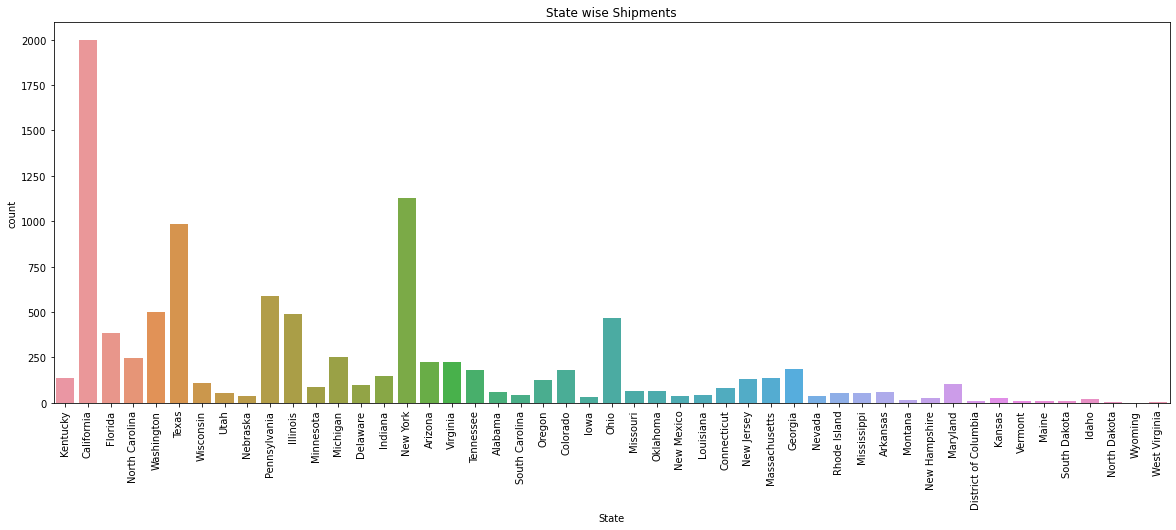

In [23]:
plt.figure(figsize=(20,7))
sns.countplot(x = df['State'])
plt.xticks(rotation = 90)
plt.title('State wise Shipments')
plt.show()

Maximum shipment is obtained from <b>California</b> followed by <b>New York and Texas respectively.</b>
    
Minimum shipment is obtained from <b>Wyoming</b>.

In [24]:
data=go.Bar(x=['First Class','Same Day','Second Class','Standard Class'],y=df['Sales'].groupby(df['Ship Mode']).agg(sum),marker=dict(color='black', line=dict(color='#000000', width=1), opacity=0.4))
layout=go.Layout(xaxis=dict(title='Ship mode',),
                    yaxis=dict(title='Sales'),bargap=0.5,title = 'Sales FROM DIFFERENT SHIP MODE')
fig=go.FigureWidget(data,layout)

iplot(fig)

In [25]:
data=go.Bar(x=['First Class','Same Day','Second Class','Standard Class'],y=df['Profit'].groupby(df['Ship Mode']).agg(sum),marker=dict(color='black', line=dict(color='#000000', width=1), opacity=0.4))
layout=go.Layout(xaxis=dict(title='Ship mode',),
                    yaxis=dict(title='Profit'),bargap=0.5,title = 'PROFIT FROM DIFFERENT SHIP MODE')
fig=go.FigureWidget(data,layout)

iplot(fig)

From above two Bar-Graph, it can be observed: 

<b> - Sales are maximum through Standard Class Ship-Mode in comparison to others.</b>

<b> 
    - Even Profit is maximum in Standard Class.</b>

In [26]:
data=go.Bar(x=['Central','East','South','West'],y=df['Profit'].groupby(df['Region']).agg(sum),marker=dict(color='black', line=dict(color='#000000', width=1), opacity=0.4))
layout=go.Layout(xaxis=dict(title='Region',),
                    yaxis=dict(title='Profit'),bargap=0.5,title = 'PROFIT FROM DIFFERENT REGION')
fig=go.FigureWidget(data,layout)

iplot(fig)

In [41]:
df['Profit'].groupby(df['Region']).agg(sum)

Region
Central     39655.8752
East        91506.3092
South       46749.4303
West       108329.8079
Name: Profit, dtype: float64

<b>Profit is maximum in WEST region and minimum in CENTRAL region. </b>

In [33]:
data=go.Bar(x=['Central','East','South','West'],y=df['Sales'].groupby(df['Region']).agg(sum),marker=dict(color='black', line=dict(color='#000000', width=1), opacity=0.4))
layout=go.Layout(xaxis=dict(title='Region',),
                    yaxis=dict(title='Sales'),bargap=0.5,title = 'Sales in DIFFERENT REGION')
fig=go.FigureWidget(data,layout)

iplot(fig)

In [32]:
df['Sales'].groupby(df['Region']).agg(sum)

Region
Central    500782.8528
East       678435.1960
South      391721.9050
West       725255.6365
Name: Sales, dtype: float64

<b>SALE is maximum in WEST region and minimum in SOUTH region.</b>

Text(0.5, 1.0, 'PROFIT Vs DISCOUNT')

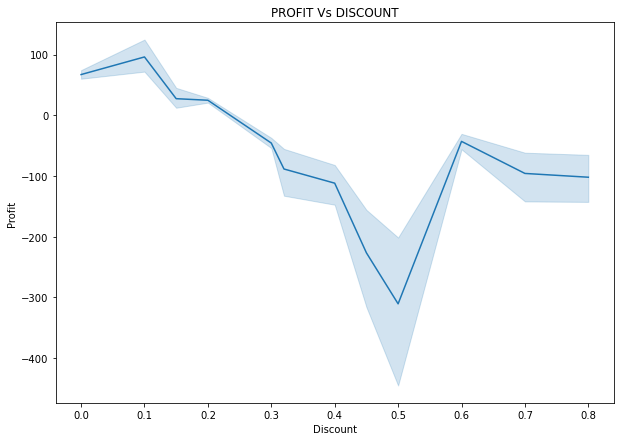

In [28]:
plt.figure(figsize = (10,7))
sns.lineplot(x = df['Discount'],y = df['Profit'],)
plt.title('PROFIT Vs DISCOUNT')



<b>According to the plot from above in order to maintain profit margins the percentage of discounts should be kept less than 20% to 30%(approx).</b>



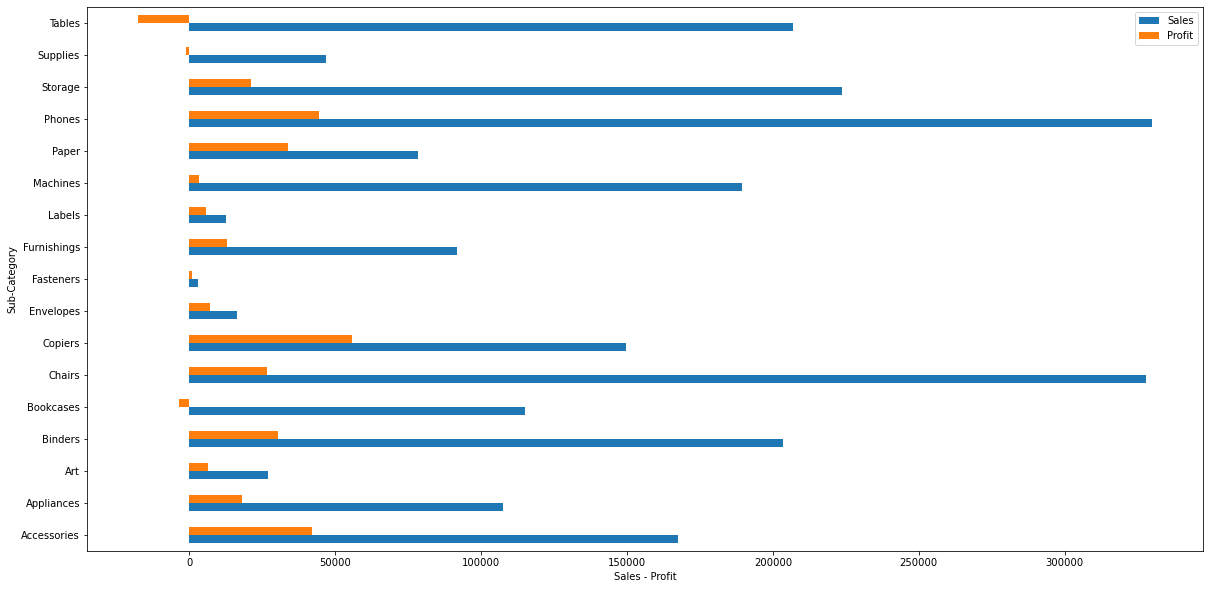

In [29]:
df.groupby('Sub-Category')[['Sales','Profit']].agg(sum).plot(kind = 'barh',figsize=(20,10) )
plt.xlabel('Sales - Profit')
plt.ylabel('Sub-Category')
plt.show()

<b>In three areas that are Tables, Bookcases and Supplies, we are at loss. On the sales of the tables we are having maximum loss. </b>

Text(0.5, 1.0, 'Count of Ship mode accoding to region and ship mode')

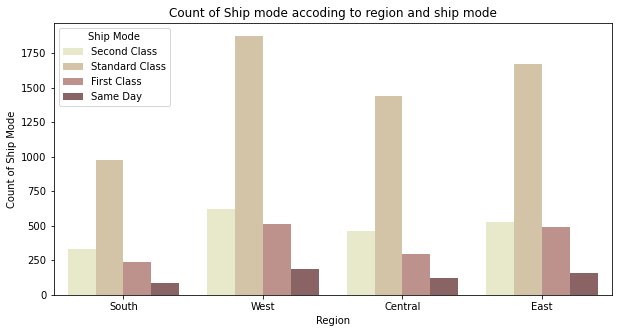

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='Region',
    hue='Ship Mode',
    data=df,color = None,palette='pink_r')

plt.xlabel('Region')
plt.ylabel('Count of Ship Mode')
plt.title('Count of Ship mode accoding to region and ship mode')

<b>Southern Region is having least Sales.
    
Standard mode of shipment is mostly opted and Same-day mode is least opted.</b> 

# Observation

- California is having the highest customers followed by New York and Texas respectively.
- At max discount should be kept between 20% - 30 %.
- There is no definite correlation either in between discount and profit or in sales and profit.  
- Both Sales and Profit are maximum in Standard shipment.
- In Central Region we are having maximum Sales and also maximum discount is provided there due which we are facing the maximum loss from Furnitures.
- Profit is maximum in WEST region and minimum in CENTRAL region.
- SALE is maximum in WEST region and minimum in SOUTH region.
- In three sub-categories that are Tables, Bookcases and Supplies, we are at loss. On the sales of the tables we are having maximum loss.
- Standard mode of shipment is mostly opted and Same-day mode is least opted.

# Conclusion:

<b> The weak areas where we can work to make more profit are: </b>

- We should keep the discount range between 20-30%.
- In Central Region we need to decrease the discount rate on the sale of furniture category.
- The sales and profit in Sourthern and Central region are less so we should provide incentives like increasing discount in other-supplies and technology category in order to increase sales.
- After highest sales in California we have high value of potential customers in Texas and New York so we should concentrate more in these places.
- Few places like North Dakota, Wyoming and West Virginia have extremely less or no sales at all so we need to focus more in these ares also. 